# Natural Language Processing (NLP)
## Mini Project

# Help Zomato Predict Rating from the Review 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 

In [2]:
zomato = pd.read_csv("Zomato_reviews.csv")
zomato.head()

,rating,review_text
0,1.0,"Their service is worst, pricing in menu is dif..."
1,5.0,really appreciate their quality and timing . I...
2,4.0,"Went there on a Friday night, the place was su..."
3,4.0,A very decent place serving good food.\r\nOrde...
4,5.0,One of the BEST places for steaks in the city....


In [3]:
zomato.shape

(27762, 2)

In [4]:
zomato1 = zomato[~zomato.review_text.isnull()].copy()
zomato1.reset_index(inplace=True, drop=True)
zomato1.shape

(27748, 2)

In [5]:
zomato_reviews = zomato1.review_text.values
len(zomato_reviews)

27748

In [6]:
#Normalizing case

reviews_lower = [txt.lower() for txt in zomato_reviews]
reviews_lower[2:4]

['went there on a friday night, the place was surprisingly empty. interesting menu which is almost fully made of dosas. i had bullseye dosa and cheese masala dosa. the bullseye dosa was really good, with the egg perfectly cooked to a half boiled state. the masala in the cheese masala was good, but the cheese was a bit too chewy for my liking. the chutney was good, the sambar was average. the dishes are reasonably priced.',
 'a very decent place serving good food.\r\nordered chilli fish, chicken & pork sizzler.\r\neverything tasted good but pork could have been slightly better cooked.\r\ntried 2 beverages, both were very sweet.']

In [7]:
reviews_lower = [" ".join(txt.split()) for txt in reviews_lower]
reviews_lower[2:4]

['went there on a friday night, the place was surprisingly empty. interesting menu which is almost fully made of dosas. i had bullseye dosa and cheese masala dosa. the bullseye dosa was really good, with the egg perfectly cooked to a half boiled state. the masala in the cheese masala was good, but the cheese was a bit too chewy for my liking. the chutney was good, the sambar was average. the dishes are reasonably priced.',
 'a very decent place serving good food. ordered chilli fish, chicken & pork sizzler. everything tasted good but pork could have been slightly better cooked. tried 2 beverages, both were very sweet.']

In [8]:
#Tokenize
from nltk.tokenize import word_tokenize
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\hruth\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [9]:
print(word_tokenize(reviews_lower[0]))

['their', 'service', 'is', 'worst', ',', 'pricing', 'in', 'menu', 'is', 'different', 'from', 'bill', '.', 'they', 'can', 'give', 'you', 'a', 'bill', 'with', 'increased', 'pricing', '.', 'even', 'for', 'serving', 'water', ',', 'menu', ',', 'order', 'you', 'need', 'to', 'call', 'them', '3-4', 'times', 'even', 'on', 'a', 'non', 'busy', 'day', '.']


In [10]:
reviews_tokens = [word_tokenize(sent) for sent in reviews_lower]
print(reviews_tokens[0])

['their', 'service', 'is', 'worst', ',', 'pricing', 'in', 'menu', 'is', 'different', 'from', 'bill', '.', 'they', 'can', 'give', 'you', 'a', 'bill', 'with', 'increased', 'pricing', '.', 'even', 'for', 'serving', 'water', ',', 'menu', ',', 'order', 'you', 'need', 'to', 'call', 'them', '3-4', 'times', 'even', 'on', 'a', 'non', 'busy', 'day', '.']


In [11]:
#Remove stop words and punctuations

from nltk.corpus import stopwords
from string import punctuation

In [12]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\hruth\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [13]:
stop_nltk = stopwords.words("english")
stop_punct = list(punctuation)
print(stop_nltk)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [14]:
stop_nltk.remove("no")
stop_nltk.remove("not")
stop_nltk.remove("don")
stop_nltk.remove("won")

In [15]:
"no" in stop_nltk

False

In [16]:
stop_final = stop_nltk + stop_punct + ["...", "``","''", "====", "must"]

In [17]:
def del_stop(sent):
    return [term for term in sent if term not in stop_final]

In [18]:
del_stop(reviews_tokens[1])

['really',
 'appreciate',
 'quality',
 'timing',
 'tried',
 'thattil',
 'kutti',
 'dosa',
 "'ve",
 'addicted',
 'dosa',
 'really',
 'chutney',
 'really',
 'good',
 'money',
 'worth',
 'much',
 'better',
 'thattukada',
 'try']

In [19]:
#!pip install wordcloud

In [20]:
from wordcloud import WordCloud
long_string = ','.join(reviews_tokens[1])
wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=3, contour_color='steelblue')
wordcloud.generate(long_string)

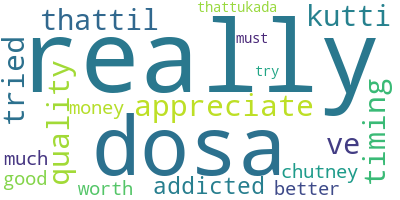

In [21]:
# Visualize the word cloud
wordcloud.to_image()

In [22]:
reviews_clean = [del_stop(sent) for sent in reviews_tokens]
reviews_clean = [" ".join(sent) for sent in reviews_clean]
reviews_clean[:2]

['service worst pricing menu different bill give bill increased pricing even serving water menu order need call 3-4 times even non busy day',
 "really appreciate quality timing tried thattil kutti dosa 've addicted dosa really chutney really good money worth much better thattukada try"]

In [23]:
len(reviews_clean)

27748

In [24]:
X = reviews_clean
y = zomato1.rating

In [25]:
#Train test split

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state=42)

In [26]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(max_features = 5000)
len(X_train), len(X_test)

(19423, 8325)

In [27]:
X_train_bow = vectorizer.fit_transform(X_train)
X_test_bow = vectorizer.transform(X_test)
X_train_bow.shape, X_test_bow.shape

((19423, 5000), (8325, 5000))

## Model building

In [28]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
RandomForestRegressor()

RandomForestRegressor()

In [29]:
learner_rf = RandomForestRegressor(random_state=42)
learner_rf.fit(X_train_bow, y_train)

RandomForestRegressor(random_state=42)

In [30]:
y_train_preds = learner_rf.predict(X_train_bow)

In [31]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_train, y_train_preds)**0.5

0.23720347586757728

In [32]:
learner_rf = RandomForestRegressor(random_state=42, n_estimators=20)
learner_rf.fit(X_train_bow, y_train)

RandomForestRegressor(n_estimators=20, random_state=42)

In [33]:
y_train_preds = learner_rf.predict(X_train_bow)
mean_squared_error(y_train, y_train_preds)**0.5

0.2507584827360229

## Hyper-parameter tuning

In [34]:
from sklearn.model_selection import GridSearchCV
RandomForestRegressor()

RandomForestRegressor()

In [35]:
learner_rf = RandomForestRegressor(random_state=42)

In [36]:
# Create the parameter grid based on the results of random search 
param_grid = {
    'max_features': [500, "sqrt", "log2", "auto"],
    'max_depth': [10, 15, 20, 25]}

In [37]:
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = learner_rf, param_grid = param_grid, 
                          cv = 5, n_jobs = -1, verbose = 1, scoring = "neg_mean_squared_error" )


In [38]:
grid_search.fit(X_train_bow, y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [10, 15, 20, 25],
                         'max_features': [500, 'sqrt', 'log2', 'auto']},
             scoring='neg_mean_squared_error', verbose=1)

In [39]:
grid_search.best_estimator_

RandomForestRegressor(max_depth=25, max_features=500, random_state=42)

## Using the best estimator to make predictions on the test set

In [40]:
y_train_pred = grid_search.best_estimator_.predict(X_train_bow)
y_test_pred = grid_search.best_estimator_.predict(X_test_bow)
mean_squared_error(y_train, y_train_pred)**0.5

0.5876681060137491

In [41]:
mean_squared_error(y_test, y_test_pred)**0.5

0.6715338514796404

In [42]:
## Identifying mismatch cases

In [43]:
res_df = pd.DataFrame({'review':X_test, 'rating':y_test, 'rating_pred':y_test_pred})
res_df[(res_df.rating - res_df.rating_pred)>=2].shape

(8, 3)

In [44]:
res_df[(res_df.rating - res_df.rating_pred)>=2]

,review,rating,rating_pred
7277,life saviours serving excellent food worst tim...,5.0,2.007670
1818,value money ordered second time,5.0,2.970624
4771,not good,5.0,1.998553
16510,may not polished serving packaging etc never b...,5.0,1.894671
14845,oh memories place first drink bangalore almost...,5.0,2.628792
15201,sauce not included,4.0,1.878766
3165,rice quantity less,5.0,2.844196
16515,may not polished serving packaging etc never b...,5.0,1.894671
